In [ ]:
import keras
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, InputLayer

In [ ]:
max_vocab=400000
max_length=25

In [ ]:
with open('/content/drive/MyDrive/newfsacd_x_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('/content/drive/MyDrive/newfsacd_x_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
with open('/content/drive/MyDrive/newfsacd_y_train.pickle', 'rb') as handle:
    Y_train = pickle.load(handle)
    
with open('/content/drive/MyDrive/newfsacd_y_test.pickle', 'rb') as handle:
    Y_test = pickle.load(handle)

with open('/content/drive/MyDrive/embmat.pickle', 'rb') as handle:
    embedding_matrix = pickle.load(handle)


In [ ]:
model = keras.models.Sequential()

model.add(InputLayer(input_shape=(max_length)))
model.add(Embedding(max_vocab, 300, weights=[embedding_matrix], input_length=max_length,mask_zero=True, trainable=False))
model.add((LSTM(64, return_sequences=True)))
model.add((LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the Model

model.compile(keras.optimizers.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history_model = model.fit(X_train,Y_train, batch_size=128, epochs=20,validation_split=0.1, verbose=True)

Epoch 1/20
10974/10974 [==============================] - 545s 49ms/step - loss: 0.6256 - accuracy: 0.7163 - val_loss: 0.4796 - val_accuracy: 0.7846
Epoch 2/20
10974/10974 [==============================] - 538s 49ms/step - loss: 0.4797 - accuracy: 0.7901 - val_loss: 0.4589 - val_accuracy: 0.7956
Epoch 3/20
10974/10974 [==============================] - 543s 49ms/step - loss: 0.4598 - accuracy: 0.8000 - val_loss: 0.4480 - val_accuracy: 0.8005
Epoch 4/20
10974/10974 [==============================] - 535s 49ms/step - loss: 0.4483 - accuracy: 0.8049 - val_loss: 0.4390 - val_accuracy: 0.8051
Epoch 5/20
10974/10974 [==============================] - 532s 49ms/step - loss: 0.4410 - accuracy: 0.8088 - val_loss: 0.4344 - val_accuracy: 0.8075
Epoch 6/20
10974/10974 [==============================] - 530s 48ms/step - loss: 0.4343 - accuracy: 0.8119 - val_loss: 0.4319 - val_accuracy: 0.8092
Epoch 7/20
10974/10974 [==============================] - 530s 48ms/step - loss: 0.4292 - accuracy: 0.8141

In [ ]:
model.save('/content/drive/MyDrive/contract_newfsact_lstm2l_w_neu')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/contract_newfsact_lstm2l_w_neu/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/contract_newfsact_lstm2l_w_neu/assets


In [ ]:
# Calculate No. of epochs
n_epochs=len(history_model.history['loss'])
e = list(range(1,n_epochs+1))

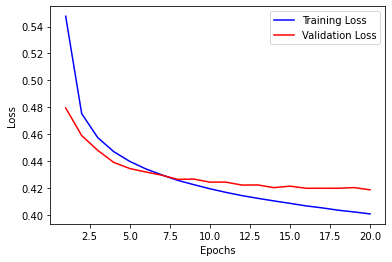

In [ ]:
# Training Loss
plt.plot(e,history_model.history['loss'],'b', label='Training Loss')
plt.plot(e, history_model.history['val_loss'], 'r', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

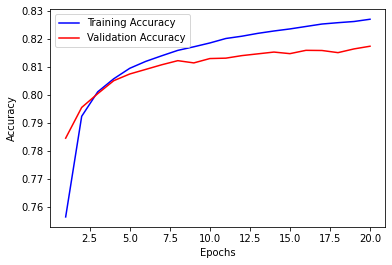

In [ ]:
# Training Loss
plt.plot(e,history_model.history['accuracy'],'b', label='Training Accuracy')
plt.plot(e, history_model.history['val_accuracy'], 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

20903/20903 [==============================] - 110s 5ms/step - loss: 0.4171 - accuracy: 0.8185


[0.4171237647533417, 0.8184861540794373]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 300)           120000000 
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 64)            93440     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 120,108,163
Trainable params: 108,163
Non-trainable params: 120,000,000
__________________________________

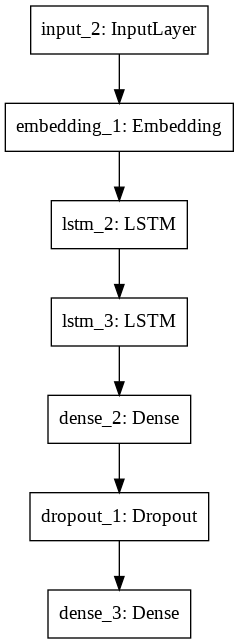

In [ ]:
model.summary()
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='/content/drive/MyDrive/contract_train_2l_lstm_model.png')